In [5]:
import qlib

from qlib.constant import REG_CN
provider_uri = "~/.qlib/qlib_data/cn_data"  # target_dir
qlib.init(provider_uri=provider_uri, region=REG_CN)

[315469:MainThread](2023-11-10 13:01:34,883) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[315469:MainThread](2023-11-10 13:01:35,056) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[315469:MainThread](2023-11-10 13:01:35,057) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/home/nathan-zheng/.qlib/qlib_data/cn_data')}


In [32]:
import torch
import torch.nn as nn

# Assume a simple scenario where:
# batch_size = 5, seq_length = 10, embedding_dim = 32, num_heads = 4

batch_size = 1
seq_length = 10
embedding_dim = 32
num_heads = 4

# Create a multi-head attention layer
multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim, num_heads=num_heads, batch_first=True)
linear = nn.Linear(32, 1)
# Example input data (query, key, value)
# Typically, in self-attention, query, key, and value are the same.
key = torch.rand(batch_size, seq_length, embedding_dim) # (N, L, E)
# Key shape needs to be --> (N, S, E)
query = key[:, 0, :].unsqueeze(0)
print(query.shape)
# Forward pass through the multi-head attention layer
attn_output, attn_output_weights = multihead_attn(query, key, key)
print("Attention Output Shape:", attn_output.shape)  # Should be [batch_size, seq_length, embedding_dim]
print("Attention Weights Shape:", attn_output_weights.shape)  # Should be [batch_size, seq_length, seq_length]
# x = attn_output.squeeze(0)


# linear(attn_output.squeeze(0).squeeze(1))

torch.Size([1, 1, 32])
Attention Output Shape: torch.Size([1, 1, 32])
Attention Weights Shape: torch.Size([1, 1, 10])


In [ ]:
# if seq_length = 10
# windows_size = 2


Text(0, 0.5, 'Price')

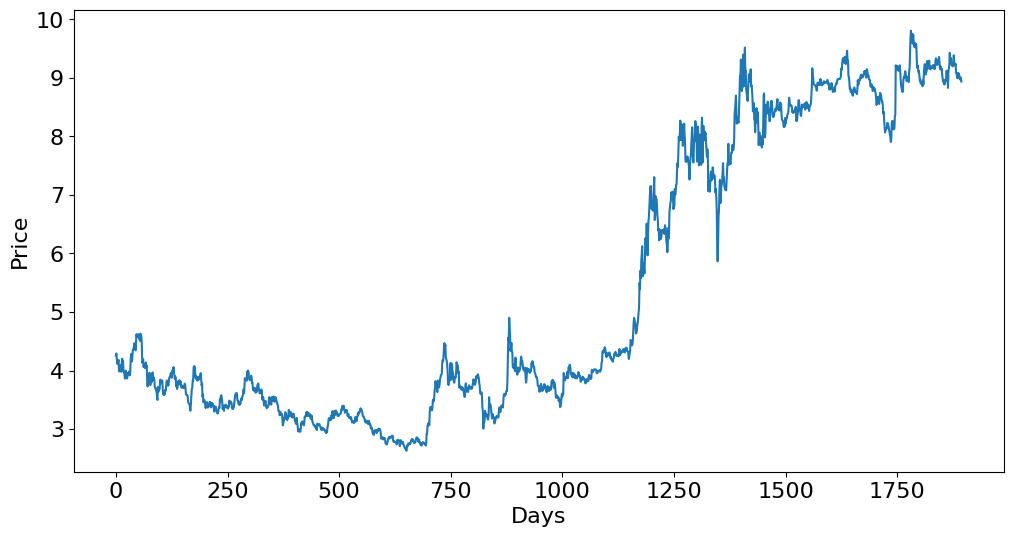

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train/SH600000.csv')
plt.figure(figsize=(12,6))
plt.plot(df['$close'].values)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Price', fontsize=16)

In [44]:
import pandas as pd

# Example DataFrame
data = {
    'col1': [1, 2, 3, 4, 5],
    'col2': [10, 20, 30, 40, 50]
}
dates = pd.date_range('2020-01-01', periods=5, freq='D')
df = pd.DataFrame(data, index=dates)

# List of datetimes
datetime_list = [pd.Timestamp('2020-01-01'), pd.Timestamp('2020-01-03'), pd.Timestamp('2020-01-06')]
print(datetime_list)
# Convert list to DatetimeIndex
datetime_index = pd.DatetimeIndex(datetime_list)

# Filter the DataFrame for dates that exist in the index
filtered_df = df[df.index.isin(datetime_index)]

print(filtered_df)


[Timestamp('2020-01-01 00:00:00'), Timestamp('2020-01-03 00:00:00'), Timestamp('2020-01-06 00:00:00')]
            col1  col2
2020-01-01     1    10
2020-01-03     3    30


In [3]:
from qlib.data import D
from qlib.data.filter import NameDFilter, ExpressionDFilter



nameDFilter = NameDFilter(name_rule_re='SH[0-9]{4}55')
expressionDFilter = ExpressionDFilter(rule_expression='$close>Ref($close,1)')
instruments = D.instruments(market='csi300', filter_pipe=[nameDFilter, expressionDFilter])
fields = ['$close', '$volume', 'Ref($close, 1)', 'Mean($close, 3)', '$high-$low']
D.features(instruments, fields, start_time='2010-01-01', end_time='2017-12-31', freq='day').head()




$close     $volume  Ref($close, 1)  Mean($close, 3)  \
instrument datetime                                                            
SH600655   2010-01-04  8.934296  47799352.0        8.667867         8.691138   
           2010-01-08  8.645658  23417642.0        8.553690         8.681605   
           2010-01-11  8.978711  48602784.0        8.645658         8.726020   
           2010-01-12  9.229269  49731500.0        8.978711         8.951213   
           2010-01-13  9.235607  43951964.0        9.229269         9.147862   

                       $high-$low  
instrument datetime                
SH600655   2010-01-04    0.412291  
           2010-01-08    0.275964  
           2010-01-11    0.485250  
           2010-01-12    0.424965  
           2010-01-13    0.424965

In [8]:
import qlib
from qlib.data import D
from qlib.data.filter import NameDFilter, ExpressionDFilter



start_train_time_step = '2010-01-01'
end_train_time_step = '2017-12-31'

start_test_time_step = '2018-01-01'
end_test_time_step = '2019-01-01'


qlib.init(provider_uri='~/.qlib/qlib_data/cn_data')
expressionDFilter = ExpressionDFilter(rule_expression='$close>Ref($close,1)')
fields = ['$close', '$volume', 'Ref($close, 1)', 'Mean($close, 3)', '$high-$low']
instruments_obj = D.instruments(market='csi300')

train_list_instruments = D.list_instruments(instruments=instruments_obj, 
                                        start_time=start_train_time_step, 
                                        end_time=end_train_time_step, 
                                        as_list=True)

for instrm in train_list_instruments:
    df_train = D.features([instrm], 
                        fields, 
                        start_time=start_train_time_step, 
                        end_time=end_train_time_step, 
                        freq='day')
    break
    

[315469:MainThread](2023-11-10 13:01:44,326) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[315469:MainThread](2023-11-10 13:01:44,330) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[315469:MainThread](2023-11-10 13:01:44,331) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/home/nathan-zheng/.qlib/qlib_data/cn_data')}


In [7]:
import os
import numpy as np
import pandas as pd
import qlib
from qlib.data import D
from qlib.data.filter import NameDFilter, ExpressionDFilter


In [8]:

def retrieve_data(output_path):
    
    # utility function
    def get_label(x):
        if x == 0:
            return 0
        elif x > 0:
            return 1
        elif x < 0:
            return 2
        
    train_output_path = os.path.join(output_path, 'train')
    test_output_path = os.path.join(output_path, 'test')
    
    start_train_time_step = '2010-01-01'
    end_train_time_step = '2017-12-31'
    start_test_time_step = '2018-01-01'
    end_test_time_step = '2019-01-01'
    
    
    qlib.init(provider_uri='~/.qlib/qlib_data/cn_data')
    ##### Train data #####
    # expressionDFilter = ExpressionDFilter(rule_expression='$close>Ref($close,1)')
    fields = ['$close', '$open','$volume', '$open-$close']
    instruments_obj = D.instruments(market='csi300')
    
    train_list_instruments = D.list_instruments(instruments=instruments_obj, 
                                          start_time=start_train_time_step, 
                                          end_time=end_train_time_step, 
                                          as_list=True)
    
    ##### Test data #####
    # expressionDFilter = ExpressionDFilter(rule_expression='$close>Ref($close,1)')
    fields = ['$close', '$open','$volume', '$open-$close']
    instruments_obj = D.instruments(market='csi300')
    
    test_list_instruments = D.list_instruments(instruments=instruments_obj, 
                                          start_time=start_test_time_step, 
                                          end_time=end_test_time_step, 
                                          as_list=True)

    for instrm in train_list_instruments:
        df_train = D.features([instrm], 
                            fields, 
                            start_time=start_train_time_step, 
                            end_time=end_train_time_step, 
                            freq='day').dropna()
        if len(df_train) != 0:
            df_train['label'] = df_train['$open-$close'].map(get_label)
            df_train.to_csv(os.path.join(train_output_path, f'{instrm}.csv'), index=False)


    for instrm in test_list_instruments:
        df_test = D.features([instrm], 
                            fields, 
                            start_time=start_test_time_step, 
                            end_time=end_test_time_step, 
                            freq='day').dropna()
        if len(df_test) != 0:
            df_test['label'] = df_test['$open-$close'].map(get_label)
            df_test.to_csv(os.path.join(test_output_path, f'{instrm}.csv'), index=False)

retrieve_data('data/')


[324505:MainThread](2023-11-10 13:50:13,344) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[324505:MainThread](2023-11-10 13:50:13,632) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[324505:MainThread](2023-11-10 13:50:13,633) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/home/nathan-zheng/.qlib/qlib_data/cn_data')}


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, output_size):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Change shape to (seq_len, batch_size, hidden_size)
        output = self.transformer(x, x)
        output = output.permute(1, 0, 2)  # Change shape back to (batch_size, seq_len, hidden_size)
        output = self.fc(output[:, ::5, :])  # Use the output from the last time step for prediction
        return output

# Create a sample data tensor
data = torch.randn(1, 1000, 4)  # Assuming 1 batch, 1000 time steps, and 4 features

# Instantiate the Transformer model
input_size = 4
hidden_size = 64
num_layers = 2
num_heads = 4
output_size = 3
model = TransformerModel(input_size, hidden_size, num_layers, num_heads, output_size)

output = model(data)
print("Model Output Shape:", output.shape)


Model Output Shape: torch.Size([1, 200, 3])


In [43]:
import torch
import torch.nn as nn

# 假设你有一个 query 样本和 100 个 key-value 样本
query = torch.rand(1, 1, 64)  # (batch_size, seq_len, embed_size)
keys_values = torch.rand(10, 1, 64)  # (num_samples, seq_len, embed_size)

# 使用 nn.MultiheadAttention
attention_layer = nn.MultiheadAttention(embed_dim=64, num_heads=4, batch_first=True)
attention_scores, attention_output = attention_layer(query, keys_values, keys_values, average_attn_weights=True)

# attention_scores 的形状为 (1, 1, 100)，表示对于 query 样本，与每个 key 样本之间的 attention scores
print("Attention Scores Shape:", attention_scores.shape)
(attention_scores.mean(-1))

RuntimeError: shape '[1, 4, 16]' is invalid for input of size 640

In [9]:
def calculate_residual(data_path):
    train_path = os.path.join(data_path, 'train')
    test_path = os.path.join(data_path, 'test')
    train_file = os.listdir(train_path)
    test_file = os.listdir(test_path)
    
    for file in train_file:
        df_train = pd.read_csv(os.path.join(train_path, file))
        price_residual = df_train['$close'][1:].values - df_train['$close'][:-1].values
        volume_residual = df_train['$volume'][1:].values - df_train['$volume'][:-1].values
        price_residual = np.hstack((np.array([0]), price_residual))
        volume_residual = np.hstack((np.array([0]), volume_residual))
        df_train['price_residual'] = pd.Series(price_residual)
        df_train['volume_residual'] = pd.Series(volume_residual)
        df_train.to_csv(os.path.join(train_path, file), index=False)
        
        
    for file in test_file:
        df_test = pd.read_csv(os.path.join(test_path, file))
        price_residual = df_test['$close'][1:].values - df_test['$close'][:-1].values
        volume_residual = df_test['$volume'][1:].values - df_test['$volume'][:-1].values
        price_residual = np.hstack((np.array([0]), price_residual))
        volume_residual = np.hstack((np.array([0]), volume_residual))
        df_test['price_residual'] = pd.Series(price_residual)
        df_test['volume_residual'] = pd.Series(volume_residual)
        df_test.to_csv(os.path.join(test_path, file), index=False)
    
calculate_residual('data')

In [10]:
from torch.utils.data import DataLoader, Dataset
import torch
import numpy as np
from torch.nn.utils.rnn import pad_sequence


class QlibDataset(Dataset):
    def __init__(self, data_path, mean, std):
        self.stock_list = np.array(os.listdir(data_path))
        self.data_path = data_path
        self._mean = mean
        self._std = std
        
    def __len__(self):
        return len(self.stock_list)
    
    def __getitem__(self, idx):
        data_cols = self.mean.columns
        stock = self.stock_list[idx]
        df_data = pd.read_csv(os.path.join(self.data_path, stock))
        label = torch.tensor(df_data['label'].to_numpy())
        
        df_data = df_data[data_cols]
        for col in data_cols:
            df_data[col] = (df_data[col] - self.mean[col]) / self.std[col]
            
        data = torch.tensor(df_data.to_numpy())
        return data, label


def collate_fn(batch):
    data, labels = zip(*batch)
    data = pad_sequence(list(data), batch_first=True, padding_value=0)
    labels = pad_sequence(list(labels), batch_first=True, padding_value=-1)
    return data, labels


def load_data(data_path=None):
    train_dataset = QlibDataset('data/train')
    test_dataset = QlibDataset('data/test')
    
    batch_size = 2
    shuffle = True
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=collate_fn)
    return train_loader, test_loader

train_loader, test_loader = load_data()

In [12]:
import numpy as np
import pandas as pd
import os


def calculate_mean_std(data_path):
    
    list_instruments = os.listdir(data_path)
    list_data = []
    
    for i in list_instruments:
        df = pd.read_csv(os.path.join(data_path, i))
        df = df.drop(columns=['label', '$open', '$open-$close'])
        columns = df.columns
        list_data.append(df.to_numpy())
        break
    list_data = np.vstack(np.array(list_data))
    mean = list_data.mean(axis=0)
    std = list_data.std(axis=0)
    
    col_mean = {columns[i]:mean[i] for i in range(len(columns))}
    col_std = {columns[i]:std[i] for i in range(len(columns))}
    return col_mean, col_std 

mean, std = calculate_mean_std('data/train/')

In [15]:
print(mean)
print(std)

{'$close': 5.3985699433544285, '$volume': 268923302.45464134, 'price_residual': 0.002484823839662447, 'volume_residual': -161549.83333333334}
{'$close': 2.385323706539264, '$volume': 283814859.98154825, 'price_residual': 0.10681935847155745, 'volume_residual': 160722848.51482645}


In [19]:
df = pd.read_csv('data/train/SH600000.csv')

for col in mean.keys():
    df[col] = (df[col]-mean[col])/std[col]
    
df[mean.keys()]

,$close,$volume,price_residual,volume_residual
0,-0.477317,0.212543,-0.023262,0.001005
1,-0.463831,1.070560,0.277873,1.516148
2,-0.499229,0.748687,-0.813709,-0.567379
3,-0.538842,0.546323,-0.907826,-0.356344
4,-0.519457,0.204066,0.409599,-0.603374
...,...,...,...,...
1891,1.497772,-0.852065,-0.223385,0.029206
1892,1.512708,-0.872244,0.310273,-0.034628
1893,1.506734,-0.785682,-0.156674,0.153863
1894,1.482836,-0.829497,-0.556920,-0.076366


## Build Model

In [9]:
import torch
import torch.nn as nn
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_stacked_layers):
#         super().__init__()
#         self.hidden_size = hidden_size
#         self.num_stacked_layers = num_stacked_layers

#         self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
#                             batch_first=True)
        
#         self.fc = nn.Linear(hidden_size, 3)

#     def forward(self, x):
#         batch_size = x.size(0)
#         h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
#         c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
#         # x = x.view(-1, 100, 4)
#         out, _ = self.lstm(x, (h0, c0))
#         print(out.shape)
#         out = self.fc(out[:, ::5, :]) # we are taking the final state only, but we actually needs to predict
#         return out

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        
        # the data needs to be shape like (batch_size, seq_length, feature)
        # x = x.view(-1, 100, 4) 
        
        self.rnn = nn.RNN(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        # data needs to be the size --> (batch, seq, feature)
        self.fc = nn.Linear(hidden_size, 3)
        
    def forward(self, x):
        x = x.to(DEVICE)
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(DEVICE)
        # c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(DEVICE)
        
        out, _ = self.rnn(x, h0)
        # I wish to take not simply the final state, I am doing the move prediction. so every time step is matter
        out = self.fc(out[:, ::5, :]) # we are taking the final state only, but we actually needs to predict
        return out

input_size = 4
hidden_size = 32
num_stacked_layers = 2



original_tensor = torch.randn(256, 1894, 4)
# reshaped_tensor = original_tensor.view(32, 100, 100, -1)
# print(reshaped_tensor.shape)

# model = LSTM(input_size, hidden_size, num_stacked_layers)
model = RNN(input_size, hidden_size, num_stacked_layers).to(DEVICE)
out = model(original_tensor)
print(out.shape)

torch.Size([256, 1894, 32])
tensor([[[-0.0591, -0.3767,  0.1700,  ...,  0.2575,  0.1159,  0.1737],
         [-0.3511, -0.1409,  0.3102,  ...,  0.2375, -0.1269,  0.2990],
         [-0.1803, -0.3702,  0.2341,  ...,  0.0754, -0.1813,  0.3604],
         ...,
         [-0.1919, -0.4488,  0.1029,  ...,  0.2334, -0.1316,  0.2924],
         [ 0.0091, -0.3425,  0.4339,  ...,  0.0359, -0.1034,  0.1537],
         [-0.4121, -0.1682,  0.2422,  ...,  0.1007, -0.2653,  0.3144]],

        [[-0.3330, -0.3727,  0.2218,  ...,  0.1490,  0.0817,  0.2523],
         [-0.3729, -0.3142,  0.1405,  ...,  0.2514, -0.0445,  0.3942],
         [-0.4630, -0.3519,  0.0916,  ...,  0.0682, -0.1469,  0.3643],
         ...,
         [ 0.2392, -0.5651,  0.4064,  ..., -0.3546, -0.0507,  0.3015],
         [-0.1868, -0.4107, -0.0199,  ...,  0.0955, -0.1389,  0.0625],
         [-0.1735, -0.0979,  0.3981,  ...,  0.4470,  0.0030,  0.1765]],

        [[-0.4046, -0.3111,  0.0403,  ...,  0.2315,  0.0319,  0.2955],
         [-0.4415

TypeError: 'NoneType' object is not subscriptable

In [ ]:
from utils import *
import tqdm

import torch.functional as F
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# Seq length 是不一样长的，我们可以算完后drop掉他们

def train(args, model, loss_fn, loader, optimizer, epoch, window_size):
    model.train()
    y_pred = []
    y_true = []
    losses = 0
    loop = tqdm(loader)
    
    for i, (data, label) in enumerate(loop):
        data = data.to(DEVICE)
        output = model(data)
        optimizer.zero_grad()
        label = label[::window_size].to(DEVICE)
        
        loss = loss_fn(output, label)
        y_pred.append(F.softmax(output, dim=1).detach().cpu().numpy())
        y_true.extend(label.detach().cpu().numpy())
        losses += loss.item()
        loss.backward()
        optimizer.step()

    y_pred = np.concatenate(y_pred, axis=0)
    metrics = evaluate(args, y_pred, y_true)
    metrics['loss'] = losses / (i+1)

    progress = ProgressMeter(
        args,
        mode='train',
        meters=metrics,
        prefix= f'Epoch [{epoch}] --->  '
    )
    
    progress.display()


In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm

def train(args, model, loss_fn, loader, optimizer, epoch):
    model.train()
    y_pred = []
    y_true = []
    losses = 0
    loop = tqdm(loader)
    
    for i, (image, label) in enumerate(loop):
        image = image.to(DEVICE)
        output = model(image)
        optimizer.zero_grad()
        label = label.to(DEVICE)
        loss = loss_fn(output, label)
        y_pred.append(F.softmax(output, dim=1).detach().cpu().numpy())
        y_true.extend(label.detach().cpu().numpy())
        losses += loss.item()
        loss.backward()
        optimizer.step()

    y_pred = np.concatenate(y_pred, axis=0)
    metrics = evaluate(args, y_pred, y_true)
    metrics['loss'] = losses / (i+1)

    progress = ProgressMeter(
        args,
        mode='train',
        meters=metrics,
        prefix= f'Epoch [{epoch}] --->  '
    )
    
    progress.display()


In [30]:
import torch
import torch.nn as nn

class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Fully connected layer to map LSTM output to desired output size
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Forward pass through LSTM layer
        lstm_out, _ = self.lstm(x)
        
        # Take the output from the last time step
        lstm_out = lstm_out[:, -1, :]
        
        # Forward pass through fully connected layer
        output = self.fc(lstm_out)
        
        return output

# Example usage:
input_size = 5  # Feature size
hidden_size = 10  # Hidden layer size (LSTM units)
output_size = 1   # Output size

# Create an instance of the SimpleLSTM model
model = SimpleLSTM(input_size, hidden_size, output_size)


input_sequence = torch.randn(3, 10, 5)
output = model(input_sequence)


print("Input shape:", input_sequence.shape)
print("Output shape:", output)

Input shape: torch.Size([3, 10, 5])
Output shape: tensor([[0.1551],
        [0.1799],
        [0.0693]], grad_fn=<AddmmBackward0>)
